In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the CSV
file_path = '../data/taco_sales_(2024-2025).csv'
df = pd.read_csv(file_path)

# 2) Convert date columns to datetime
df['Order Time'] = pd.to_datetime(
    df['Order Time'],
    infer_datetime_format=True,
    dayfirst=True,
    errors='coerce'
)
df['Delivery Time'] = pd.to_datetime(
    df['Delivery Time'],
    infer_datetime_format=True,
    dayfirst=True,
    errors='coerce'
)

# 3) (Optional) Derive new columns for convenience
df['Order Date']  = df['Order Time'].dt.date
df['Order Hour']  = df['Order Time'].dt.hour
df['Weekday']     = df['Order Time'].dt.day_name()  # e.g., 'Monday', 'Tuesday'
df['Weekend']     = df['Order Time'].dt.weekday >= 5  # Boolean: Saturday/Sunday

# 4) Quick look
df.head(5)


/var/folders/h4/vsh7n_wx1fv3kqncq36zdqm80000gn/T/ipykernel_12243/1607158699.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Time'] = pd.to_datetime(
/var/folders/h4/vsh7n_wx1fv3kqncq36zdqm80000gn/T/ipykernel_12243/1607158699.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Delivery Time'] = pd.to_datetime(


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Date,Order Hour,Weekday,Weekend
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08-01,14,Thursday,False
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11-23,17,Saturday,True
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11-21,20,Thursday,False
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09-21,6,Saturday,True
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07-24,11,Wednesday,False


In [3]:
# Number of rows & columns
df.shape    # e.g., (1000, 13) or (1000, 15) depending on derived columns

# Data types and non-null counts
df.info()

# Descriptive stats for numeric columns
df[['Delivery Duration (min)', 'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)']].describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order ID                 1000 non-null   int64         
 1   Restaurant Name          1000 non-null   object        
 2   Location                 1000 non-null   object        
 3   Order Time               1000 non-null   datetime64[ns]
 4   Delivery Time            1000 non-null   datetime64[ns]
 5   Delivery Duration (min)  1000 non-null   int64         
 6   Taco Size                1000 non-null   object        
 7   Taco Type                1000 non-null   object        
 8   Toppings Count           1000 non-null   int64         
 9   Distance (km)            1000 non-null   float64       
 10  Price ($)                1000 non-null   float64       
 11  Tip ($)                  1000 non-null   float64       
 12  Weekend Order            1000 non-n

Order ID                   0
Restaurant Name            0
Location                   0
Order Time                 0
Delivery Time              0
Delivery Duration (min)    0
Taco Size                  0
Taco Type                  0
Toppings Count             0
Distance (km)              0
Price ($)                  0
Tip ($)                    0
Weekend Order              0
Order Date                 0
Order Hour                 0
Weekday                    0
Weekend                    0
dtype: int64

In [4]:
df['Restaurant Name'] = df['Restaurant Name'].astype(str)
df['Location']        = df['Location'].astype(str)
df['Taco Size']       = df['Taco Size'].astype('category')
df['Taco Type']       = df['Taco Type'].astype('category')
df['Weekend Order']   = df['Weekend Order'].astype(bool)


In [5]:
def categorize_speed(minutes):
    if minutes <= 15:
        return 'Fast'
    elif minutes <= 30:
        return 'Average'
    else:
        return 'Slow'

df['Speed Category'] = df['Delivery Duration (min)'].apply(categorize_speed).astype('category')


In [6]:
df['Tip %'] = (df['Tip ($)'] / df['Price ($)']) * 100


In [7]:
df.to_csv('../data/taco_sales_cleaned.csv', index=False)

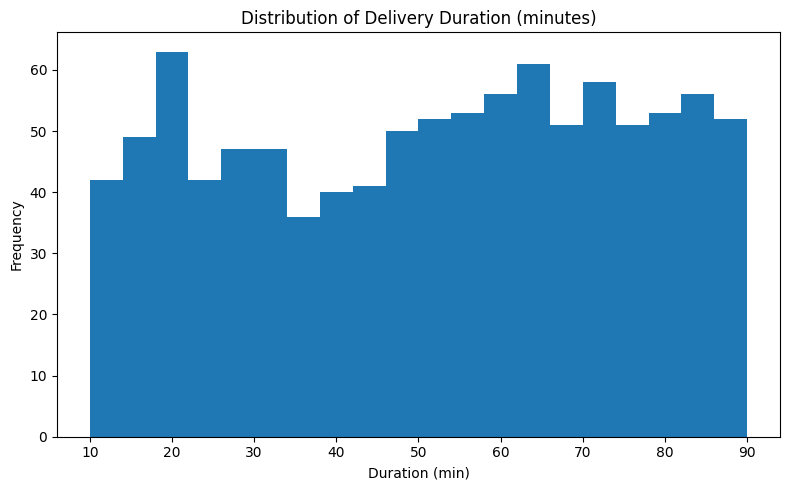

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Delivery Duration (min)'], bins=20)
plt.title('Distribution of Delivery Duration (minutes)')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

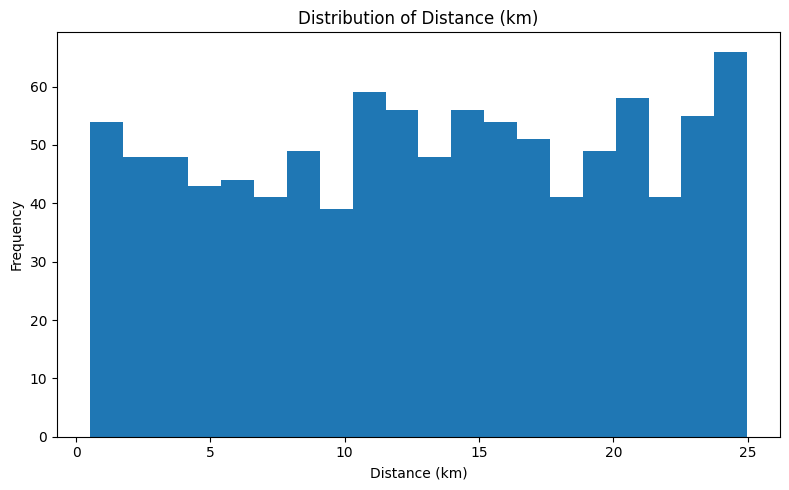

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['Distance (km)'], bins=20)
plt.title('Distribution of Distance (km)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


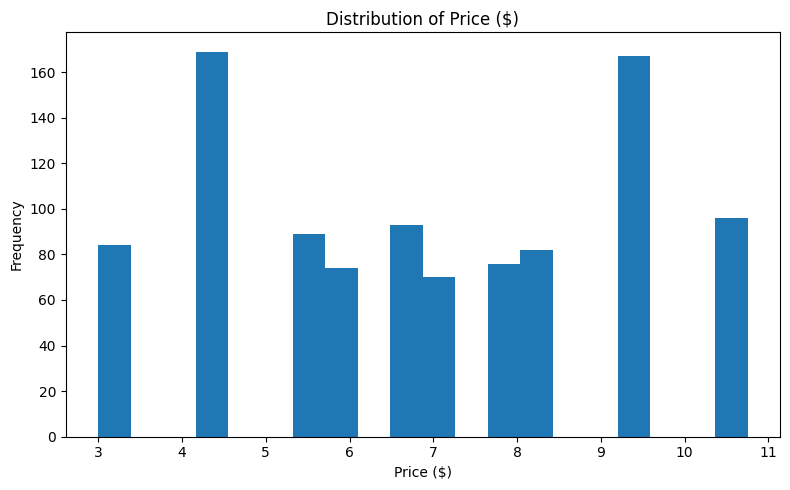

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df['Price ($)'], bins=20)
plt.title('Distribution of Price ($)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


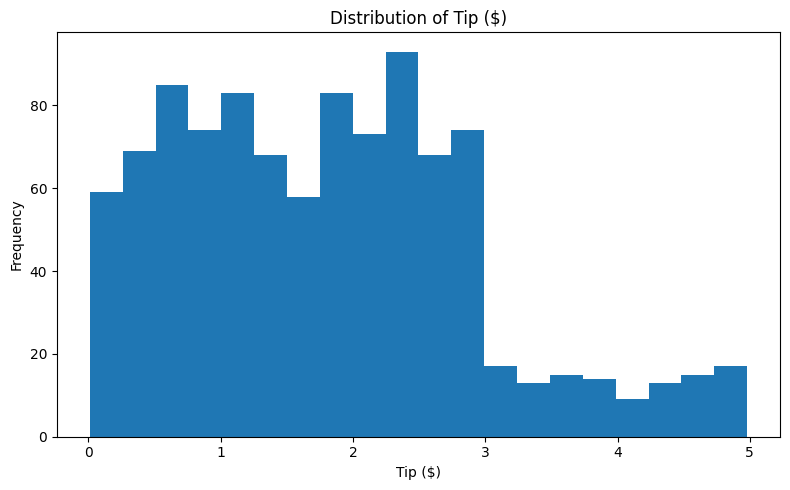

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df['Tip ($)'], bins=20)
plt.title('Distribution of Tip ($)')
plt.xlabel('Tip ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


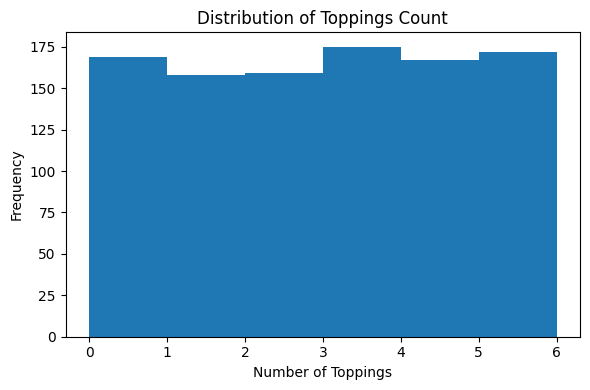

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(df['Toppings Count'], bins=range(0, df['Toppings Count'].max() + 2))
plt.title('Distribution of Toppings Count')
plt.xlabel('Number of Toppings')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


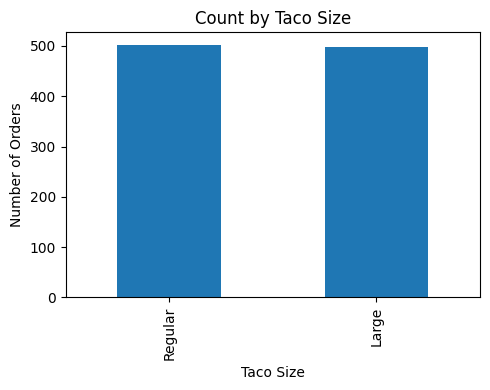

In [13]:
plt.figure(figsize=(5, 4))
df['Taco Size'].value_counts().plot(kind='bar')
plt.title('Count by Taco Size')
plt.xlabel('Taco Size')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


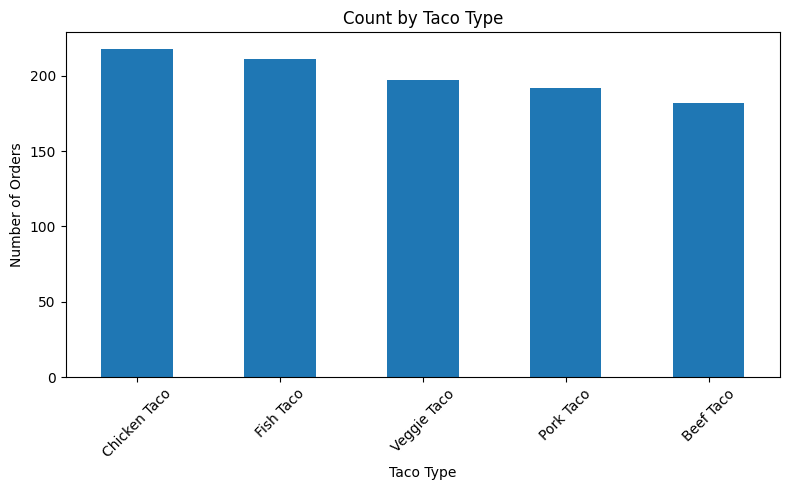

In [14]:
plt.figure(figsize=(8, 5))
df['Taco Type'].value_counts().plot(kind='bar')
plt.title('Count by Taco Type')
plt.xlabel('Taco Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


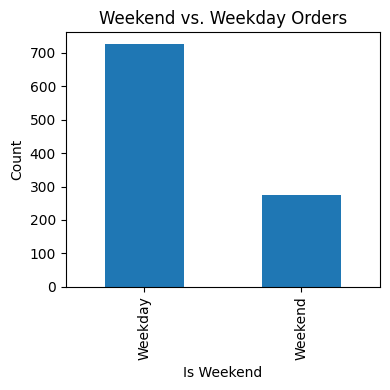

In [15]:
plt.figure(figsize=(4, 4))
df['Weekend'].value_counts().plot(kind='bar')
plt.title('Weekend vs. Weekday Orders')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()


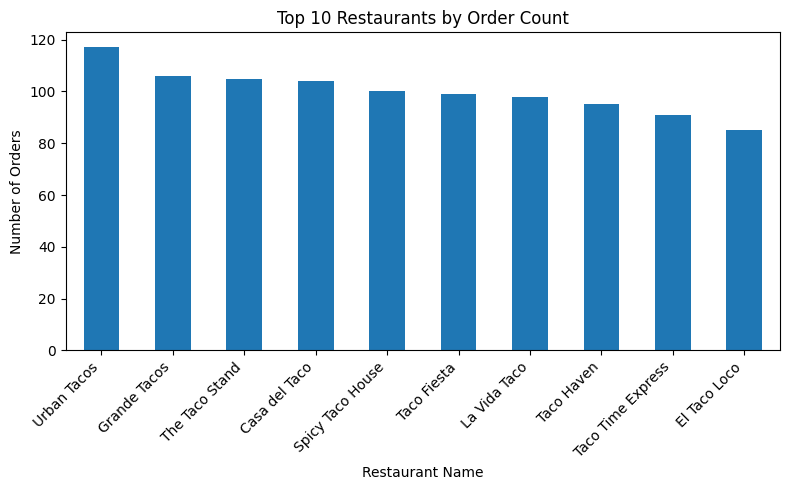

In [16]:
top_rest = df['Restaurant Name'].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
top_rest.plot(kind='bar')
plt.title('Top 10 Restaurants by Order Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


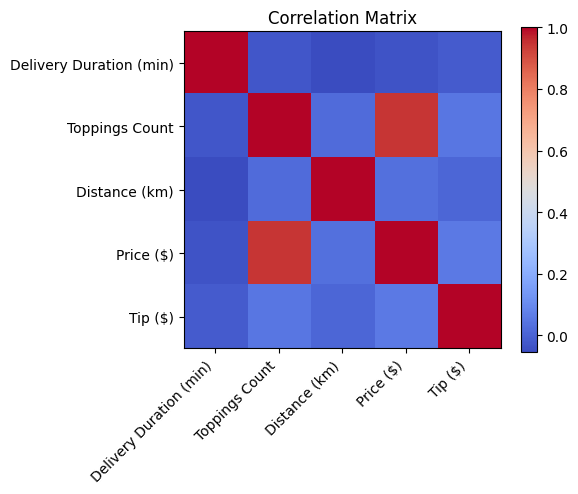

,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
Delivery Duration (min),1.000000,-0.029215,-0.055558,-0.035233,-0.017751
Toppings Count,-0.029215,1.000000,0.020239,0.945928,0.049557
Distance (km),-0.055558,0.020239,1.000000,0.031482,0.007936
Price ($),-0.035233,0.945928,0.031482,1.000000,0.059377
Tip ($),-0.017751,0.049557,0.007936,0.059377,1.000000


In [17]:
numeric_cols = ['Delivery Duration (min)', 'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Also print out the DataFrame version
corr


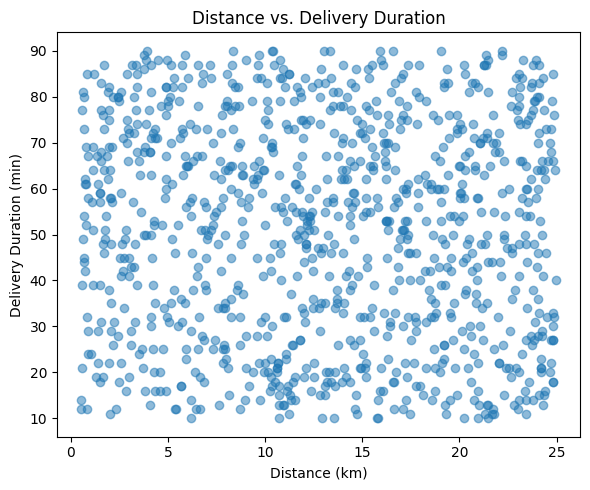

In [18]:
plt.figure(figsize=(6, 5))
plt.scatter(df['Distance (km)'], df['Delivery Duration (min)'], alpha=0.5)
plt.title('Distance vs. Delivery Duration')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Duration (min)')
plt.tight_layout()
plt.show()


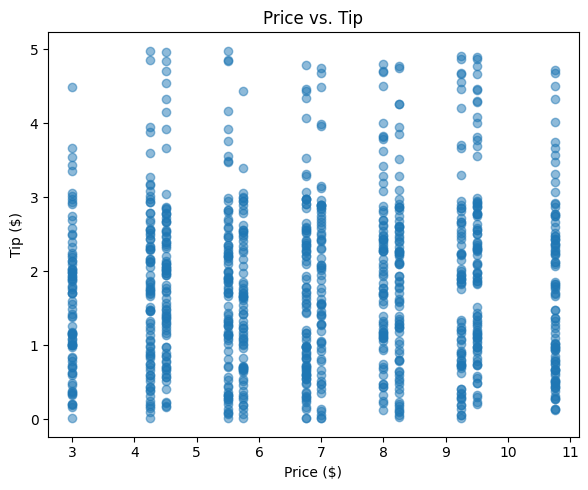

In [19]:
plt.figure(figsize=(6, 5))
plt.scatter(df['Price ($)'], df['Tip ($)'], alpha=0.5)
plt.title('Price vs. Tip')
plt.xlabel('Price ($)')
plt.ylabel('Tip ($)')
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

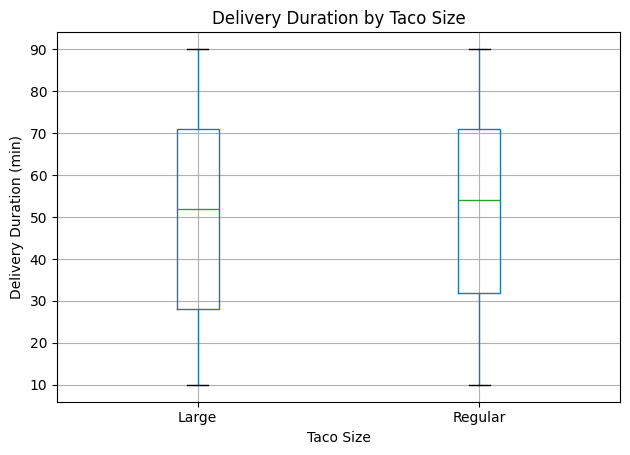

In [20]:
plt.figure(figsize=(6, 5))
df.boxplot(column='Delivery Duration (min)', by='Taco Size')
plt.title('Delivery Duration by Taco Size')
plt.suptitle('')
plt.xlabel('Taco Size')
plt.ylabel('Delivery Duration (min)')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

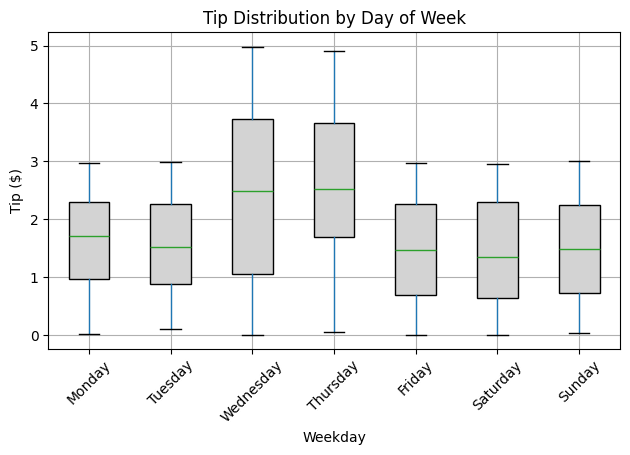

In [21]:
plt.figure(figsize=(8, 5))
# Reorder weekdays manually if desired
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df.boxplot(column='Tip ($)', by='Weekday', positions=range(len(order)), patch_artist=True, 
           boxprops=dict(facecolor='lightgray'))
plt.title('Tip Distribution by Day of Week')
plt.suptitle('')
plt.xlabel('Weekday')
plt.ylabel('Tip ($)')
plt.xticks(ticks=range(len(order)), labels=order, rotation=45)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

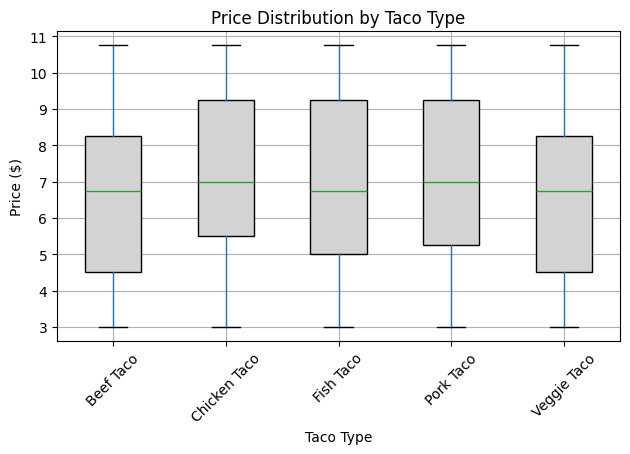

In [22]:
plt.figure(figsize=(8, 5))
df.boxplot(column='Price ($)', by='Taco Type', patch_artist=True, 
           boxprops=dict(facecolor='lightgray'))
plt.title('Price Distribution by Taco Type')
plt.suptitle('')
plt.xlabel('Taco Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
daily_counts = df.groupby('Order Date').size().reset_index(name='Order Count')
daily_counts['Order Date'] = pd.to_datetime(daily_counts['Order Date'])


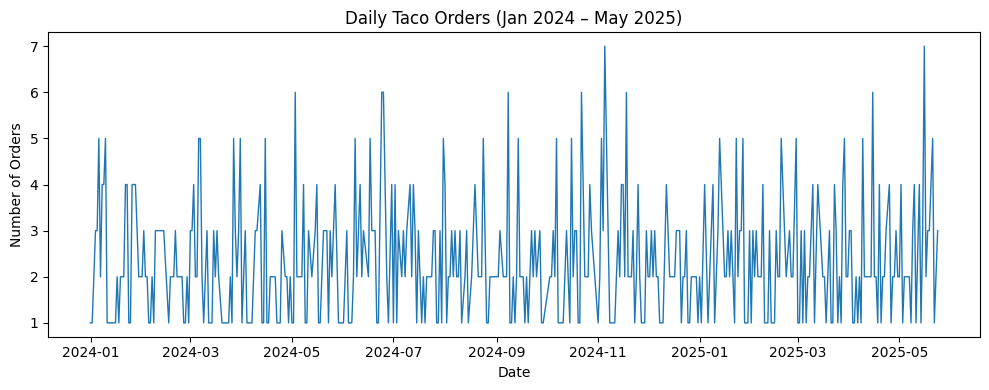

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(daily_counts['Order Date'], daily_counts['Order Count'], linewidth=1)
plt.title('Daily Taco Orders (Jan 2024 – May 2025)')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [25]:
df['Week']  = df['Order Time'].dt.isocalendar().week
df['Month'] = df['Order Time'].dt.to_period('M')


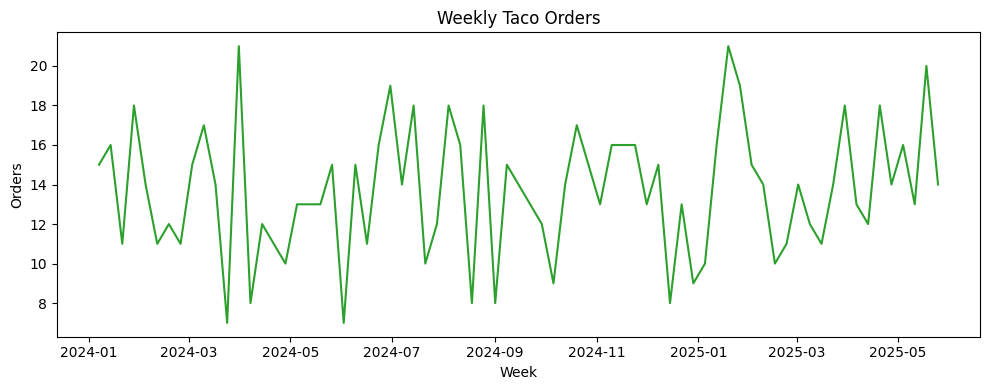

In [26]:
weekly_counts = df.resample('W', on='Order Time').size().reset_index(name='Weekly Orders')
plt.figure(figsize=(10, 4))
plt.plot(weekly_counts['Order Time'], weekly_counts['Weekly Orders'], color='tab:green')
plt.title('Weekly Taco Orders')
plt.xlabel('Week')
plt.ylabel('Orders')
plt.tight_layout()
plt.show()


/var/folders/h4/vsh7n_wx1fv3kqncq36zdqm80000gn/T/ipykernel_12243/861741948.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='Order Time').size().reset_index(name='Monthly Orders')


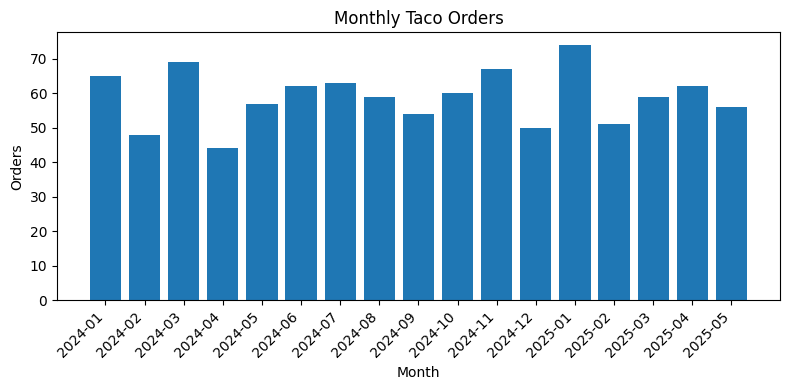

In [27]:
monthly_counts = df.resample('M', on='Order Time').size().reset_index(name='Monthly Orders')
plt.figure(figsize=(8, 4))
plt.bar(monthly_counts['Order Time'].dt.strftime('%Y-%m'), monthly_counts['Monthly Orders'])
plt.title('Monthly Taco Orders')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
# We already created a 'Speed Category' column; now inspect its distribution
df['Speed Category'].value_counts()


Speed Category
Slow       749
Average    184
Fast        67
Name: count, dtype: int64

In [29]:
speed_by_rest = (
    df.groupby(['Restaurant Name', 'Speed Category'])
      .size()
      .unstack(fill_value=0)
)
# Convert to percentages
speed_by_rest_pct = speed_by_rest.div(speed_by_rest.sum(axis=1), axis=0) * 100
speed_by_rest_pct.sort_values(by='Fast', ascending=False).head(10)


/var/folders/h4/vsh7n_wx1fv3kqncq36zdqm80000gn/T/ipykernel_12243/521325289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Restaurant Name', 'Speed Category'])


Speed Category,Average,Fast,Slow
Restaurant Name,,,
The Taco Stand,7.619048,11.428571,80.952381
El Taco Loco,18.823529,10.588235,70.588235
Taco Time Express,16.483516,8.791209,74.725275
Spicy Taco House,17.000000,8.000000,75.000000
Casa del Taco,21.153846,7.692308,71.153846
Taco Fiesta,16.161616,6.060606,77.777778
Grande Tacos,17.924528,5.660377,76.415094
Taco Haven,20.000000,4.210526,75.789474
La Vida Taco,28.571429,3.061224,68.367347


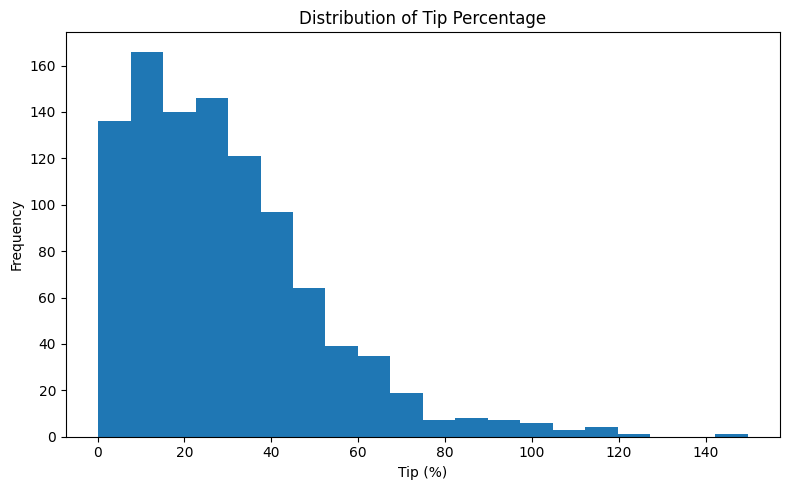

In [30]:
plt.figure(figsize=(8, 5))
plt.hist(df['Tip %'], bins=20)
plt.title('Distribution of Tip Percentage')
plt.xlabel('Tip (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

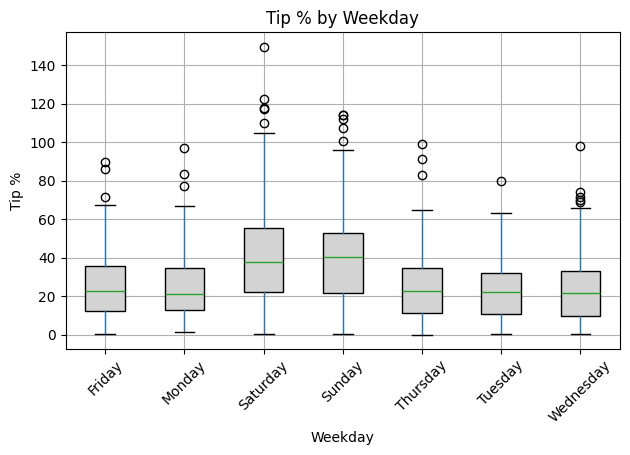

In [31]:
plt.figure(figsize=(8, 5))
df.boxplot(column='Tip %', by='Weekday', patch_artist=True, 
           boxprops=dict(facecolor='lightgray'))
plt.title('Tip % by Weekday')
plt.suptitle('')
plt.xlabel('Weekday')
plt.ylabel('Tip %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


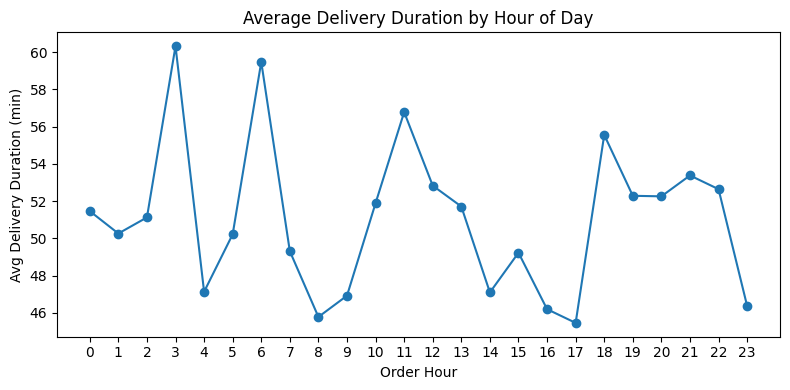

In [32]:
# Compute average duration for each hour
avg_duration_by_hour = df.groupby('Order Hour')['Delivery Duration (min)'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_duration_by_hour['Order Hour'], avg_duration_by_hour['Delivery Duration (min)'], marker='o')
plt.title('Average Delivery Duration by Hour of Day')
plt.xlabel('Order Hour')
plt.ylabel('Avg Delivery Duration (min)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()
